In [62]:
# Linear Regression Analysis COVID-19

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [96]:
# import file
file_name = '/Users/juliettegudknecht/Downloads/c19cases.csv'

df = pd.read_csv(file_name)
df.head()

,Date,Testd_ordered,Positive,Negative,total_positive,total_negative,PA_total_Negative,PA_total_Positive,PA_new_tests,PA_New_positives
0,0,1,0,1,0,1,0,2,0,2
1,1,1,0,1,0,2,0,4,2,2
2,2,0,0,0,0,2,0,6,2,2
3,3,0,0,0,0,2,0,10,4,4
4,4,0,0,0,0,2,0,12,2,2


In [97]:
df.describe()

,Date,Testd_ordered,Positive,Negative,total_positive,total_negative,PA_total_Negative,PA_total_Positive,PA_new_tests,PA_New_positives
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,21.500000,248.022727,32.704545,175.000000,397.136364,2674.613636,40170.863636,8112.568182,3499.159091,706.113636
std,12.845233,176.982260,33.367983,137.387925,480.259309,2613.419432,43216.118658,10181.595090,2889.395462,682.446598
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000
25%,10.750000,12.250000,1.750000,11.750000,4.000000,30.500000,826.750000,91.000000,316.000000,19.750000
50%,21.500000,312.500000,19.000000,177.000000,164.500000,2026.500000,23135.000000,2484.500000,3919.500000,546.500000
75%,32.250000,405.000000,59.750000,290.750000,704.000000,4872.000000,78114.000000,14979.000000,5948.000000,1375.500000
max,43.000000,495.000000,111.000000,398.000000,1439.000000,7700.000000,122896.000000,31069.000000,7915.000000,1989.000000


In [98]:
exp = df[['Date', 'Positive','PA_New_positives', 'total_positive', 'PA_total_Positive']]

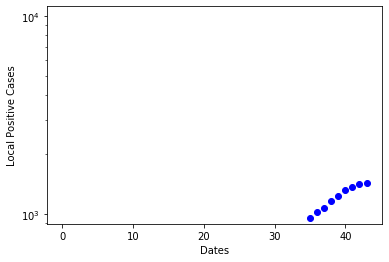

In [106]:
plt.scatter(exp.Date, exp.total_positive,  color='blue')
plt.xlabel("Dates")
plt.ylabel("Local Positive Cases")
plt.yscale('log')
plt.show()

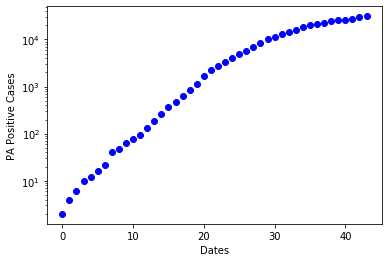

In [107]:
plt.scatter(exp.Date, exp.PA_total_Positive,  color='blue')
plt.xlabel("Dates")
plt.ylabel("PA Positive Cases")
plt.yscale('log')
plt.show()

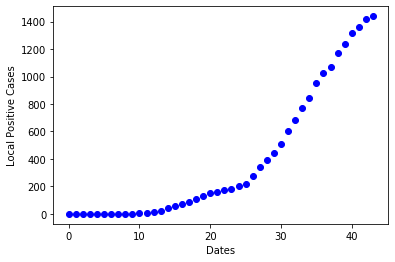

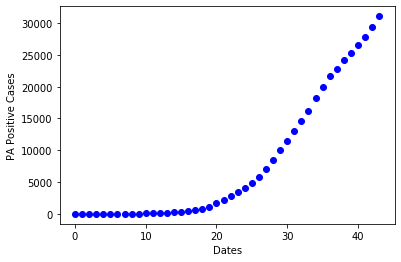

In [108]:
plt.scatter(exp.Date, exp.total_positive,  color='blue')
plt.xlabel("Dates")
plt.ylabel("Local Positive Cases")
plt.show()

plt.scatter(exp.Date, exp.PA_total_Positive,  color='blue')
plt.xlabel("Dates")
plt.ylabel("PA Positive Cases")
plt.show()

Coefficients:  [[2.51525202]]
Intercept:  [-21.06096853]


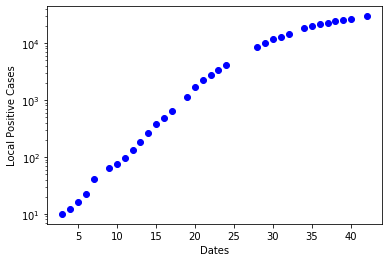

In [112]:
# linear regression 

# train
msk = np.random.rand(len(df)) < 0.8
train = exp[msk]
test = exp[~msk]

plt.scatter(train.Date, train.PA_total_Positive,  color='blue')
plt.xlabel("Dates")
plt.ylabel("Local Positive Cases")
plt.yscale('log')
#plt.show()

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Date']])
train_y = np.asanyarray(train[['Positive']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


In [116]:
def smoother(inputdata,w,imax):
    data = 1.0*inputdata
    data = data.replace(np.nan,1)
    data = data.replace(np.inf,1)
    #print(data)
    smoothed = 1.0*data
    normalization = 1
    for i in range(-imax,imax+1):
        if i==0:
            continue
        smoothed += (w**abs(i))*data.shift(i,axis=0)
        normalization += w**abs(i)
    smoothed /= normalization
    return smoothed
# function to compute growth factor
def growth_factor(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    confirmed_iminus2 = confirmed.shift(2, axis=0)
    return (confirmed-confirmed_iminus1)/(confirmed_iminus1-confirmed_iminus2)
#function to compute growth ratio
def growth_ratio(confirmed):
    confirmed_iminus1 = confirmed.shift(1, axis=0)
    return (confirmed/confirmed_iminus1)

# We don't need a function for growth rate since we can use the np.gradient() function.

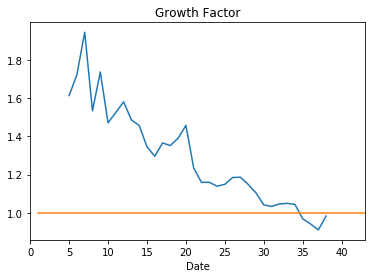

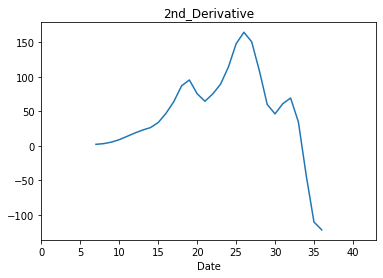

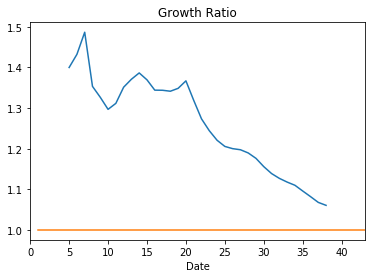

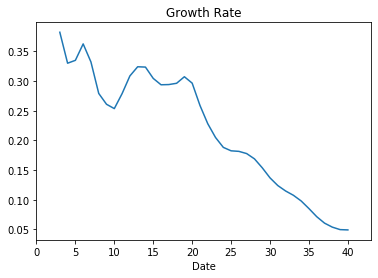

In [122]:
table = exp
table2 = pd.pivot_table(table, values=['PA_total_Positive'], index=['Date'], aggfunc=np.sum)

# Growth Factor
w = 0.5
table2['GrowthFactor'] = growth_factor(table2['PA_total_Positive'])
table2['GrowthFactor'] = smoother(table2['GrowthFactor'],w,5)

# 2nd Derivative
table2['2nd_Derivative'] = np.gradient(np.gradient(table2['PA_total_Positive'])) #2nd derivative
table2['2nd_Derivative'] = smoother(table2['2nd_Derivative'],w,7)


#Plot confirmed[i]/confirmed[i-1], this is called the growth ratio
table2['GrowthRatio'] = growth_ratio(table2['PA_total_Positive'])
table2['GrowthRatio'] = smoother(table2['GrowthRatio'],w,5)
    
#Plot the growth rate, we will define this as k in the logistic function presented at the beginning of this notebook.
table2['GrowthRate']=np.gradient(np.log(table2['PA_total_Positive']))
table2['GrowthRate'] = smoother(table2['GrowthRate'],0.5,3)

x_coordinates = [1, 100]
y_coordinates = [1, 1]

#plots
table2['GrowthFactor'].plot(title='Growth Factor')
plt.plot(x_coordinates, y_coordinates) 
plt.savefig('growthfactor.png')
plt.show()

table2['2nd_Derivative'].plot(title='2nd_Derivative')
plt.savefig('secondderivative.png')
plt.show()

table2['GrowthRatio'].plot(title='Growth Ratio')
plt.plot(x_coordinates, y_coordinates)
plt.savefig('growthratio.png')
plt.show()

table2['GrowthRate'].plot(title='Growth Rate')
plt.savefig('Growthrate.png')
plt.show()

In [126]:
# logistic regression
from scipy.optimize import curve_fit
coviddata = exp
coviddata = pd.pivot_table(coviddata, values=['total_positive', 'PA_total_Positive'], index=['Date'], aggfunc=np.sum)

# we will want x_data to be the number of days since first confirmed and the y_data to be the confirmed data. This will be the data we use to fit a logistic curve
x_data = coviddata.index
y_data = coviddata['PA_total_Positive']

def log_curve(x, k, x_0, ymax):
    return ymax / (1 + np.exp(-k*(x-x_0)))

# Fit the curve
popt, pcov = curve_fit(log_curve, x_data, y_data, bounds=([0,0,0],np.inf), maxfev=50000)
estimated_k, estimated_x_0, ymax= popt


# Plot the fitted curve
k = estimated_k
x_0 = estimated_x_0
y_fitted = log_curve(range(0,160), k, x_0, ymax)
print(k, x_0, ymax)
#print(y_fitted)
y_data.tail()


0.2121107841984122 33.3327047185127 33738.01425838461


Date
39    25345
40    26490
41    27735
42    29441
43    31069
Name: PA_total_Positive, dtype: int64

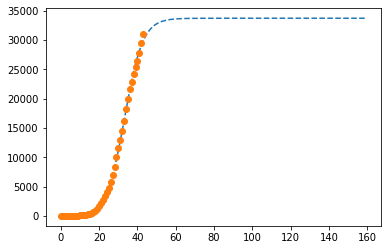

In [128]:
# Plot everything for illustration
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,160), y_fitted, '--', label='fitted')
ax.plot(x_data, y_data, 'o', label='PA Positive Cases')